**STOCK MARKET PREDICTION AND ANALYSIS** 

1. Stocks from Apple, Amazon, Google, and Microsoft are explored (closing prices, daily return, moving average). 
2. Correlation between stocks is observed. 
3. Risk of investing in a particular stock is measured.  
4. Time Series forecasting is done using ARIMA for Google Stocks.
5. Future stock prices are predicted through Long Short Term Memory (LSTM) method. 

In [1]:
!pip install yfinance pandas_datareader


In [2]:
!pip install --upgrade yfinance


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Reading stock data from Yahoo Finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

stock_data = {}

# Stocks used for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)


AAPL = stock_data['AAPL']
GOOG = stock_data['GOOG']
MSFT = stock_data['MSFT']
AMZN = stock_data['AMZN']


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

print(df.tail(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   GOOG  GOOG   
Date                                                                            
2024-12-06       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-09       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-10       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-11       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-12       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-13       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-16       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-17       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-18       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-19       NaN   NaN  

In [4]:
df.head(10)

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-12-20  193.880188  194.830002  197.679993  194.830002  196.899994   
2023-12-21  193.730896  194.679993  197.080002  193.500000  196.100006   
2023-12-22  192.656174  193.600006  195.410004  192.970001  195.179993   
2023-12-26  192.108871  193.050003  193.889999  192.830002  193.610001   
2023-12-27  192.208359  193.149994  193.500000  191.089996  192.490005   
2023-12-28  192.636292  193.580002  194.660004  193.169998  194.139999   
2023-12-29  191.591385  192.529999  194.399994  191.729996  193.899994   
2024-01-02  184.734970  185.639999  188.440002  183.889999  187.149994   
2024-01-03  183.351746  184.250000  185.880005  183.429993  184.220001   
2024-01-04  181.023163  181.910004  183.089996  180.880005  182.149994   

Price           Volume company_name Adj Close Close High  ...       Low Open  \
Ticker            AAPL                   GOOG  GOOG GOOG  ... MSFT MSFT MSFT   
Date                                                      ...                  
2023-12-20  52242800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-21  46482500.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-22  37122800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-26  28919300.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-27  48087700.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-28  34049900.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-29  42628800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2024-01-02  82488700.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2024-01-03  58414500.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2024-01-04  71983600.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   

Price      Volume Adj Close Close High  Low Open Volume  
Ticker       MSFT      AMZN  AMZN AMZN AMZN AMZN   AMZN  
Date                                                     
2023-12-20    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-21    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-22    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-26    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-27    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-28    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-29    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2024-01-02    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2024-01-03    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2024-01-04    NaN       NaN   NaN  NaN  NaN  NaN    NaN  

[10 rows x 25 columns]

In [5]:
# checking if data is downloaded correctly
for ticker in tech_list:
    print(f"{ticker} data:\n", stock_data[ticker].head(), "\n")

AAPL data:
 Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-12-20  193.880188  194.830002  197.679993  194.830002  196.899994   
2023-12-21  193.730896  194.679993  197.080002  193.500000  196.100006   
2023-12-22  192.656174  193.600006  195.410004  192.970001  195.179993   
2023-12-26  192.108871  193.050003  193.889999  192.830002  193.610001   
2023-12-27  192.208359  193.149994  193.500000  191.089996  192.490005   

Price         Volume company_name  
Ticker          AAPL               
Date                               
2023-12-20  52242800        APPLE  
2023-12-21  46482500        APPLE  
2023-12-22  37122800        APPLE  
2023-12-26  28919300        APPLE  
2023-12-27  48087700        APPLE   

GOOG data:
 Price        Adj Close       Close        High         Low        Open  \
Ticker            G

In [6]:
# Checking if 'Adj Close' exists
for ticker in tech_list:
    print(f"{ticker} columns:\n", stock_data[ticker].columns, "\n")

AAPL columns:
 MultiIndex([(   'Adj Close', 'AAPL'),
            (       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     '')],
           names=['Price', 'Ticker']) 

GOOG columns:
 MultiIndex([(   'Adj Close', 'GOOG'),
            (       'Close', 'GOOG'),
            (        'High', 'GOOG'),
            (         'Low', 'GOOG'),
            (        'Open', 'GOOG'),
            (      'Volume', 'GOOG'),
            ('company_name',     '')],
           names=['Price', 'Ticker']) 

MSFT columns:
 MultiIndex([(   'Adj Close', 'MSFT'),
            (       'Close', 'MSFT'),
            (        'High', 'MSFT'),
            (         'Low', 'MSFT'),
            (        'Open', 'MSFT'),
            (      'Volume', 'MSFT'),
            ('company_name',     '')],
           names=['Price', 'Ticker']) 

AMZN columns:
 MultiIndex([(   'Ad

**Closing Price :**  
The closing price is also referred to as “close”. Essentially it is the final traded price of a financial asset at the end of a trading day or a trading session. 

<Figure size 1000x1000 with 0 Axes>

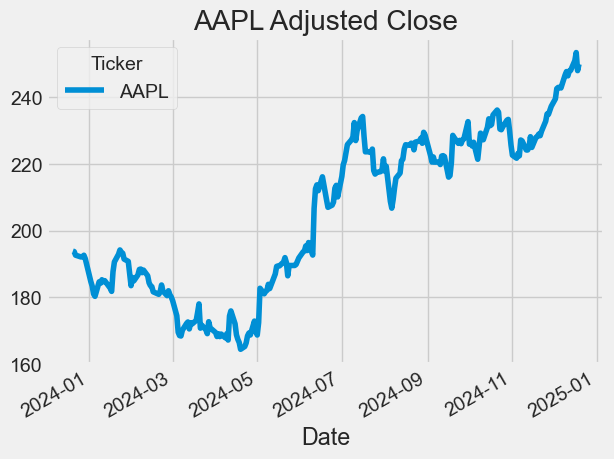

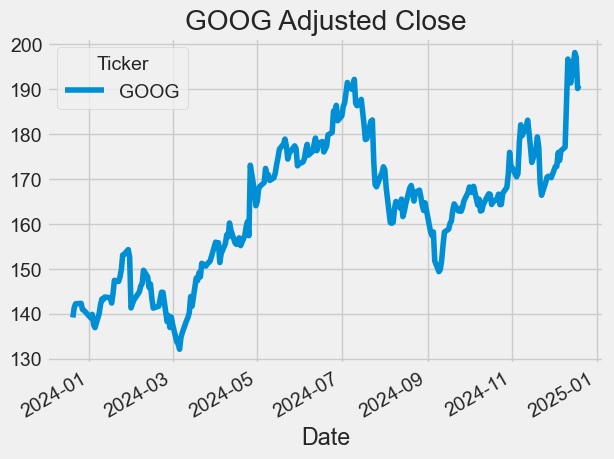

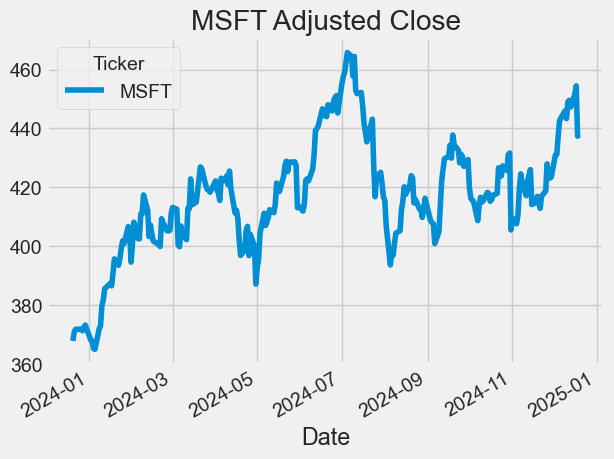

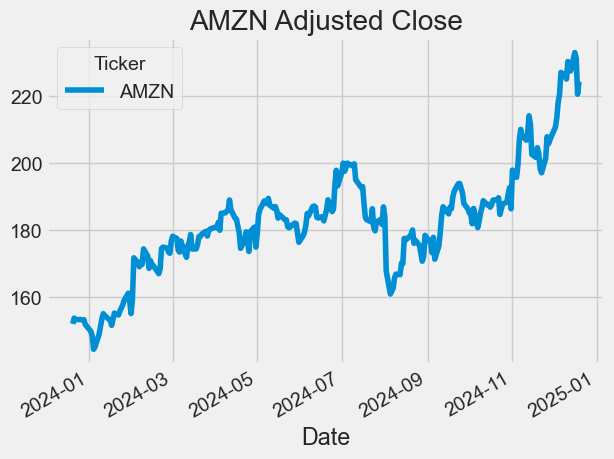

In [7]:
#Closing Price
plt.figure(figsize=(10, 10))

stock_data['AAPL']['Adj Close'].plot()
plt.title("AAPL Adjusted Close")
plt.show()

stock_data['GOOG']['Adj Close'].plot()
plt.title("GOOG Adjusted Close")
plt.show()

stock_data['MSFT']['Adj Close'].plot()
plt.title("MSFT Adjusted Close")
plt.show()

stock_data['AMZN']['Adj Close'].plot()
plt.title("AMZN Adjusted Close")
plt.show()



In [8]:
closing_df = pd.DataFrame()

for stock in tech_list:
    closing_df[stock] = stock_data[stock]['Adj Close']

tech_rets = closing_df.pct_change()

tech_rets.head()


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-12-20,NaN,NaN,NaN,NaN
2023-12-21,-0.000770,0.015323,0.007879,0.011307
2023-12-22,-0.005548,0.006488,0.002784,-0.002730
2023-12-26,-0.002841,0.000701,0.000214,-0.000065
2023-12-27,0.000518,-0.009662,-0.001575,-0.000456


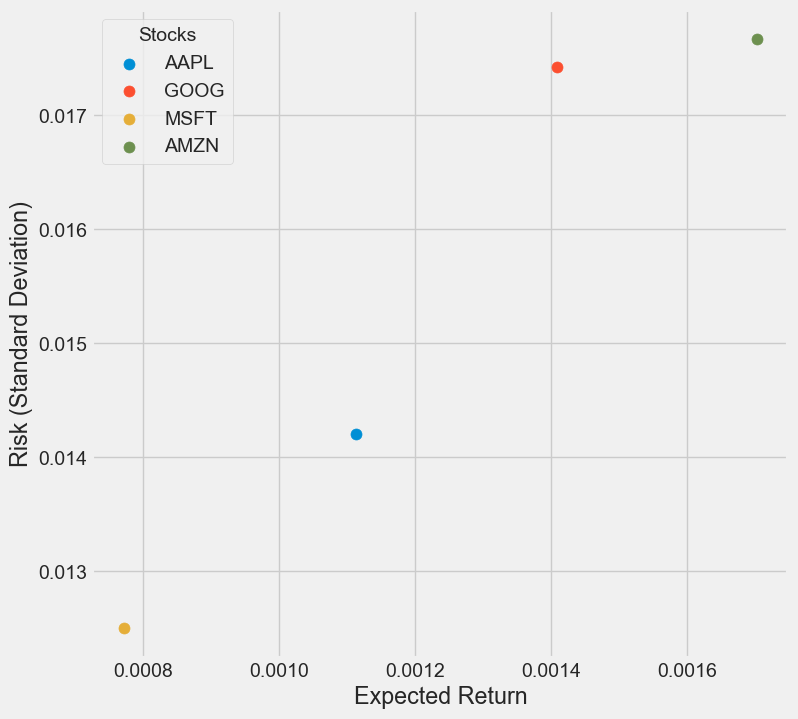

In [9]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(8, 8))

for label in rets.columns:
    plt.scatter(rets[label].mean(), rets[label].std(), s=area, label=label)

plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')

plt.legend(title='Stocks')

plt.show()

Risk-Return Tradeoff : Higher is expected return, more is the risk for the stocks.
MSFT shows low risks and potentially low returns ideal for risk averse investors. 

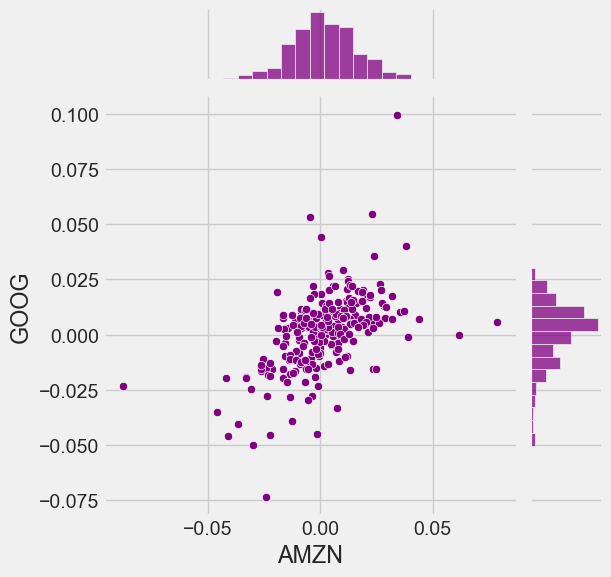

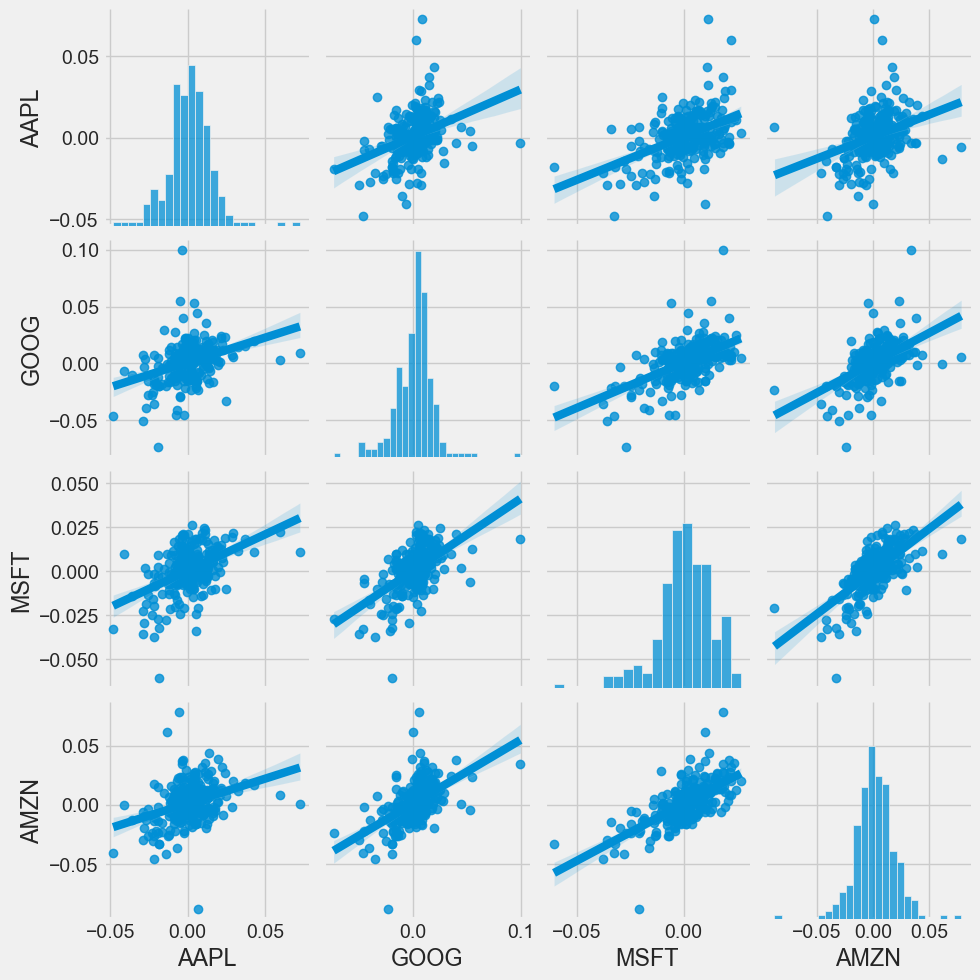

In [10]:
# compare the daily percentage return of two stocks to check correlation
sns.jointplot(x='AMZN', y='GOOG', data=tech_rets, kind='scatter', color='purple')

# Comparison Analysis for all combinations
sns.pairplot(tech_rets, kind='reg')

1. Each histogram shows rougly a bell curved shape, while AMZN stocks are normally distributed. 
2. A positive correlation is observed amongst most pairs. Slightly weaker correlations may exist for certain pairs, but none show negative or no correlation.
3. The regression lines in the scatter plots indicate linear relationships between the pairs of stocks. This suggests that when one stock’s return increases, the others tend to increase as well.
4. Stocks like GOOG and AMZN may exhibit higher dispersion (greater volatility) compared to AAPL and MSFT.

C:\Users\shubh\AppData\Local\Temp\ipykernel_7932\3274364906.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

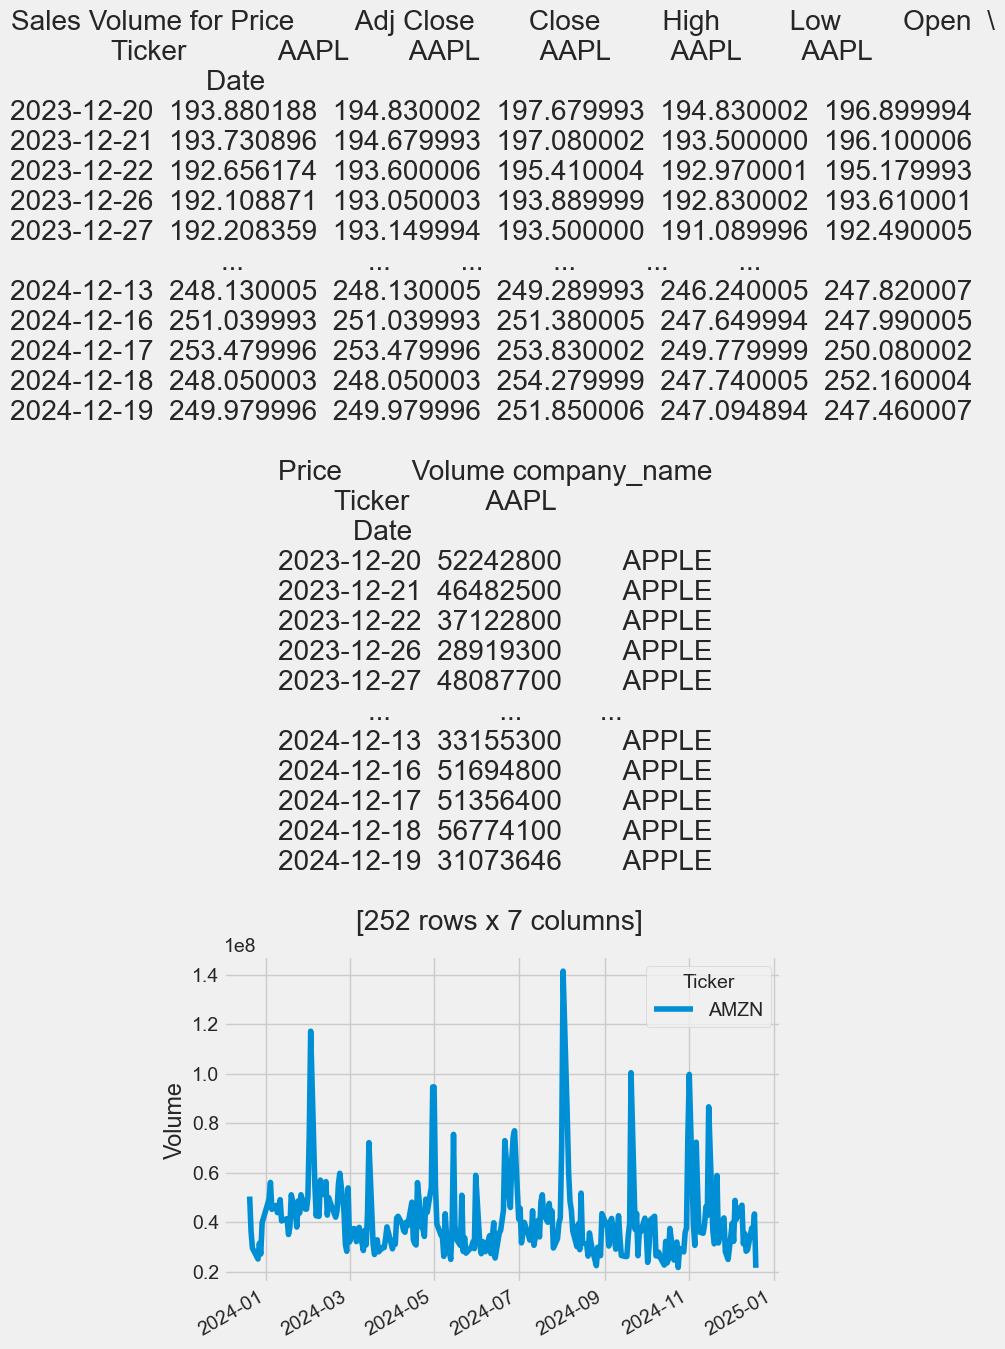

In [11]:
#Volume of Sales
plt.figure(figsize=(10, 10))

company['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for {AAPL} ")
    
plt.tight_layout()

**Moving average** is calculated to analyze data points by creating a series of averages from different subsets of the full data set. In finance, it is commonly used to smooth out short-term fluctuations in stock prices or other data to reveal long-term trends. 

Simple moving averages (SMAs) use a simple arithmetic average of prices over some timespan, while exponential moving averages (EMAs) place greater weight on more recent prices than older ones over the time period.

Text(0.5, 1.0, 'AMAZON')

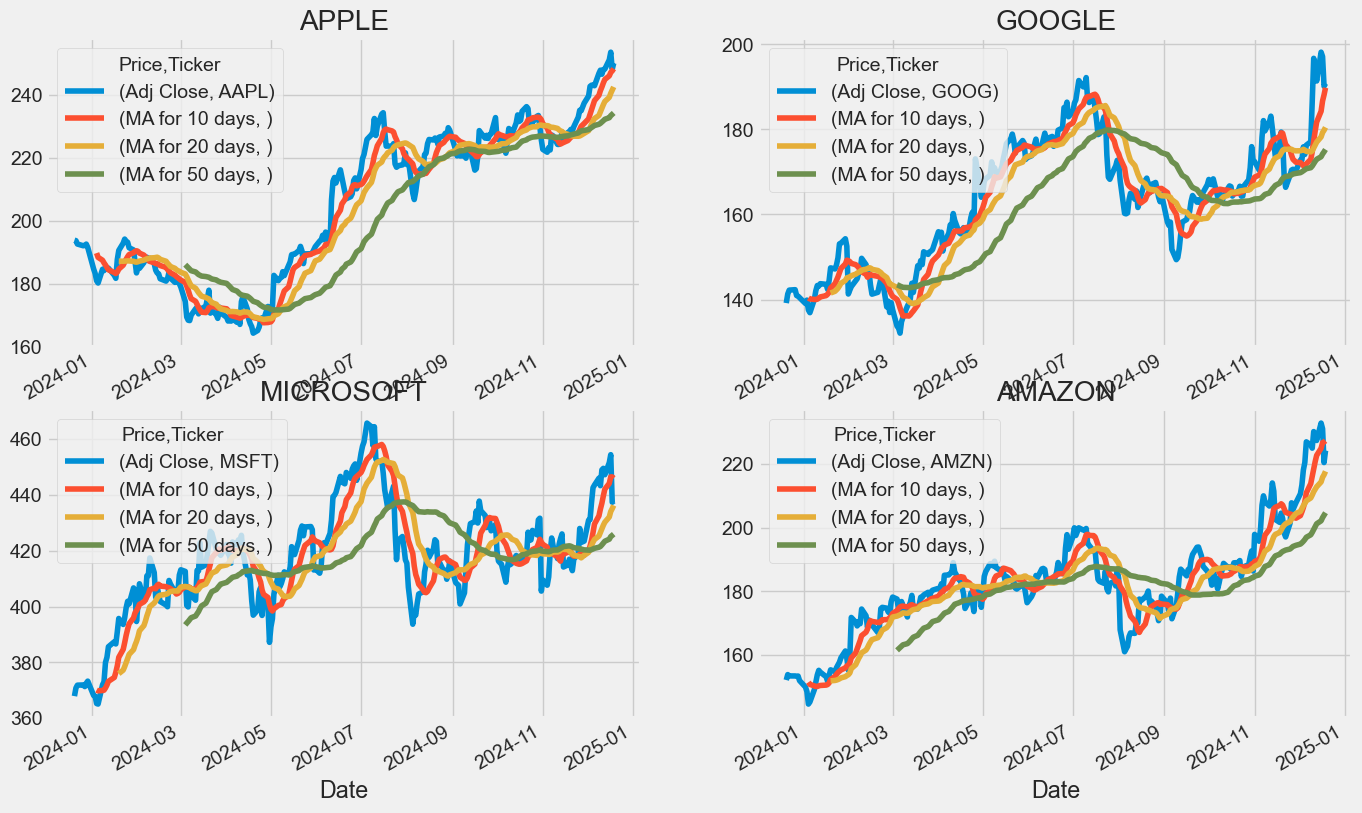

In [12]:
#Moving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

Text(0.5, 1.0, 'AMAZON')

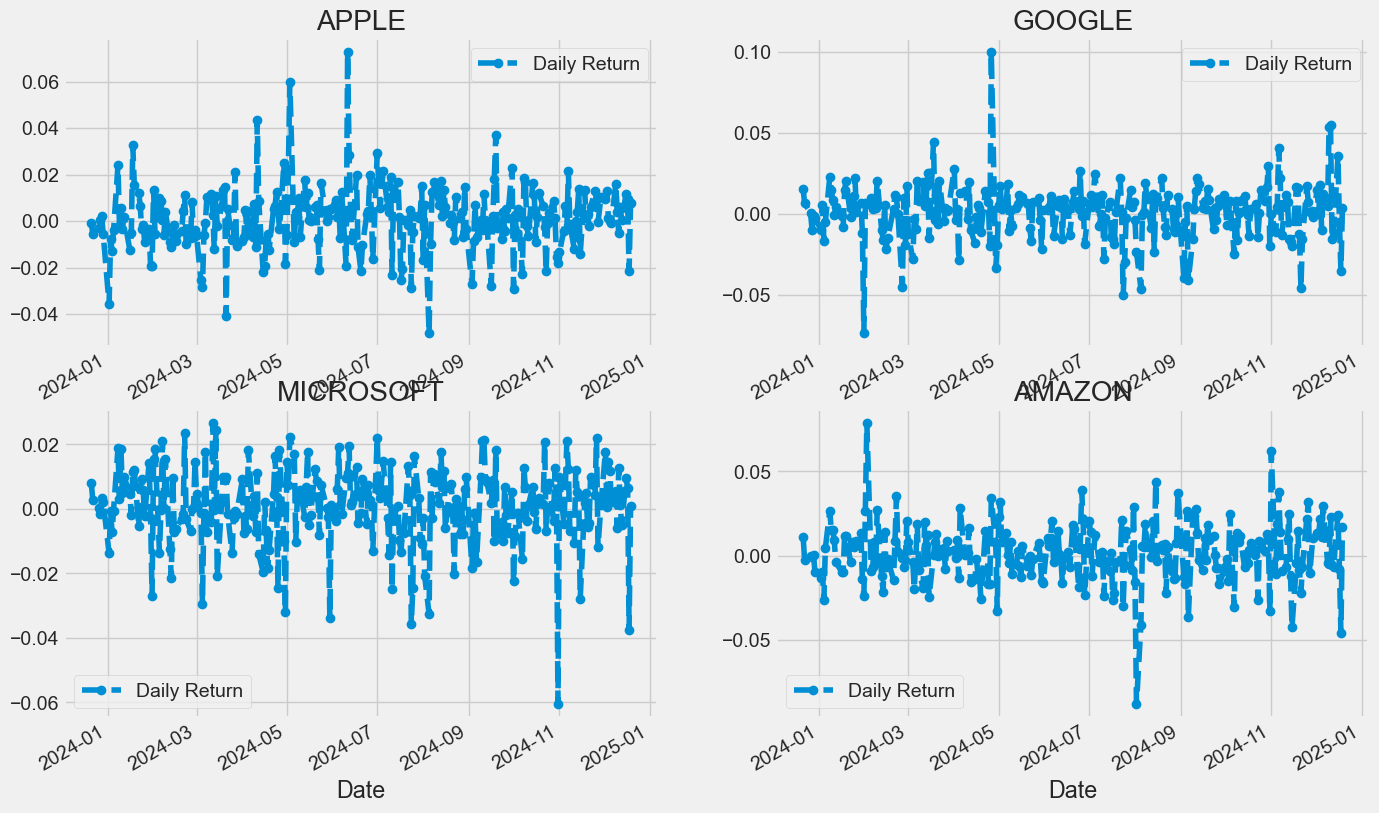

In [13]:
#daily return for stocks
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

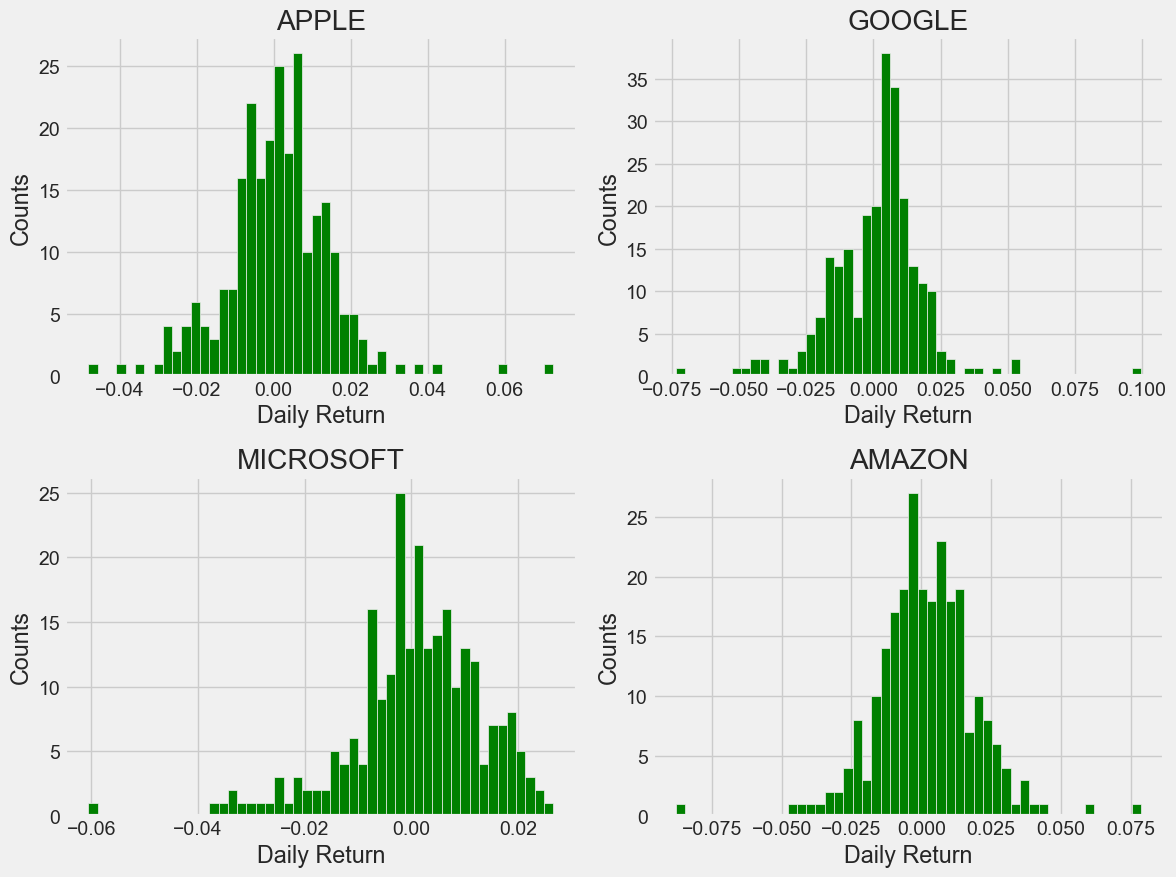

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, color='green')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Text(0.5, 1.0, 'Correlation of stock closing price')

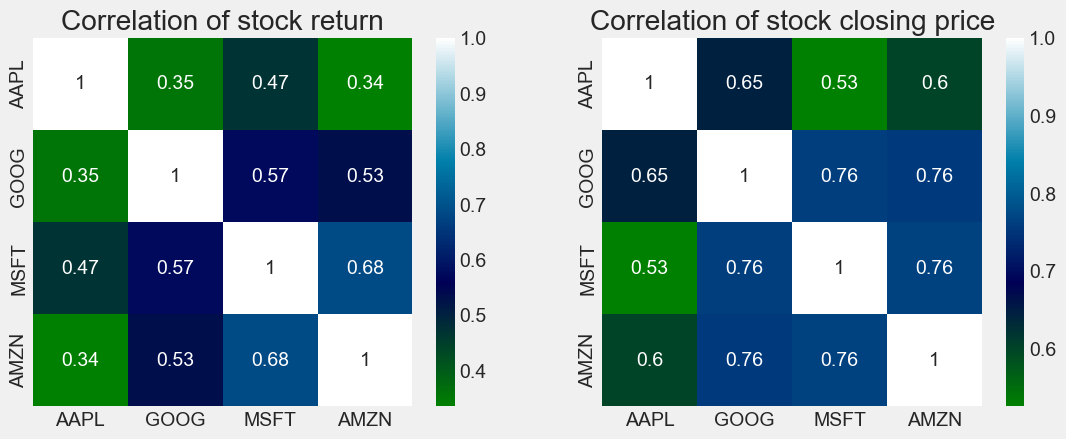

In [15]:
plt.figure(figsize=(12, 10))

#correlation of stock return
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='ocean')
plt.title('Correlation of stock return')

#correlation of stock closing price
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='ocean')
plt.title('Correlation of stock closing price')

**TIME SERIES FORECASTING USING ARIMA FOR GOOGLE STOCK PRICES**

In [16]:
import datetime
from datetime import date, timedelta
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

Price        Date        Open        High         Low       Close   Adj Close  \
Ticker                   GOOG        GOOG        GOOG        GOOG        GOOG   
246    2024-12-13  192.710007  194.339996  191.259995  191.380005  191.380005   
247    2024-12-16  194.365005  200.639999  194.110001  198.160004  198.160004   
248    2024-12-17  198.529999  202.880005  196.690002  197.119995  197.119995   
249    2024-12-18  196.830002  198.690002  189.279999  190.149994  190.149994   
250    2024-12-19  193.279999  194.600006  190.160004  190.710007  190.710007   

Price     Volume  
Ticker      GOOG  
246     18883200  
247     32248600  
248     24129500  
249     27638400  
250     14893648  


In [17]:
data = data[["Date", "Close"]]
print(data.head())

Price        Date       Close
Ticker                   GOOG
0      2023-12-21  141.800003
1      2023-12-22  142.720001
2      2023-12-26  142.820007
3      2023-12-27  141.440002
4      2023-12-28  141.279999


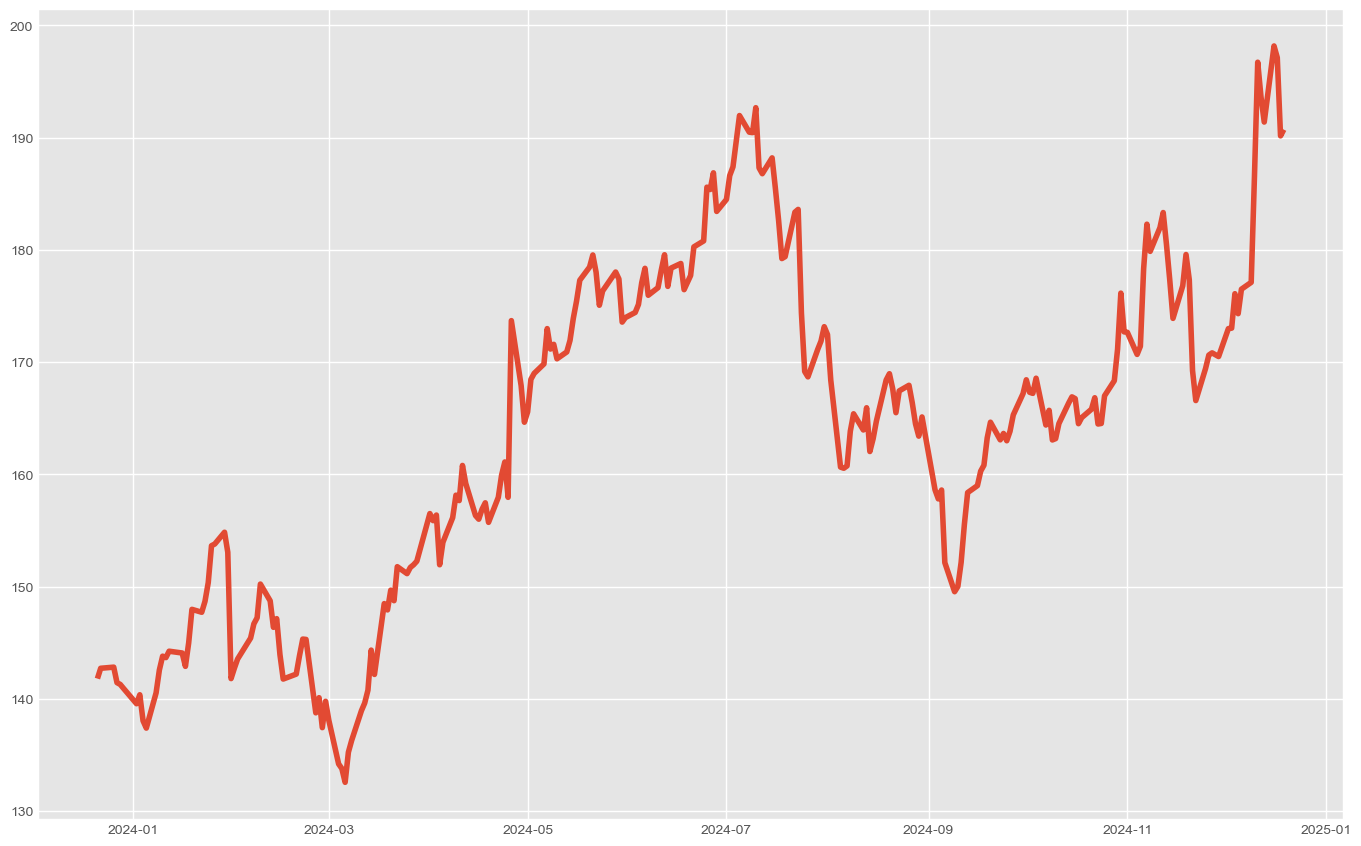

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

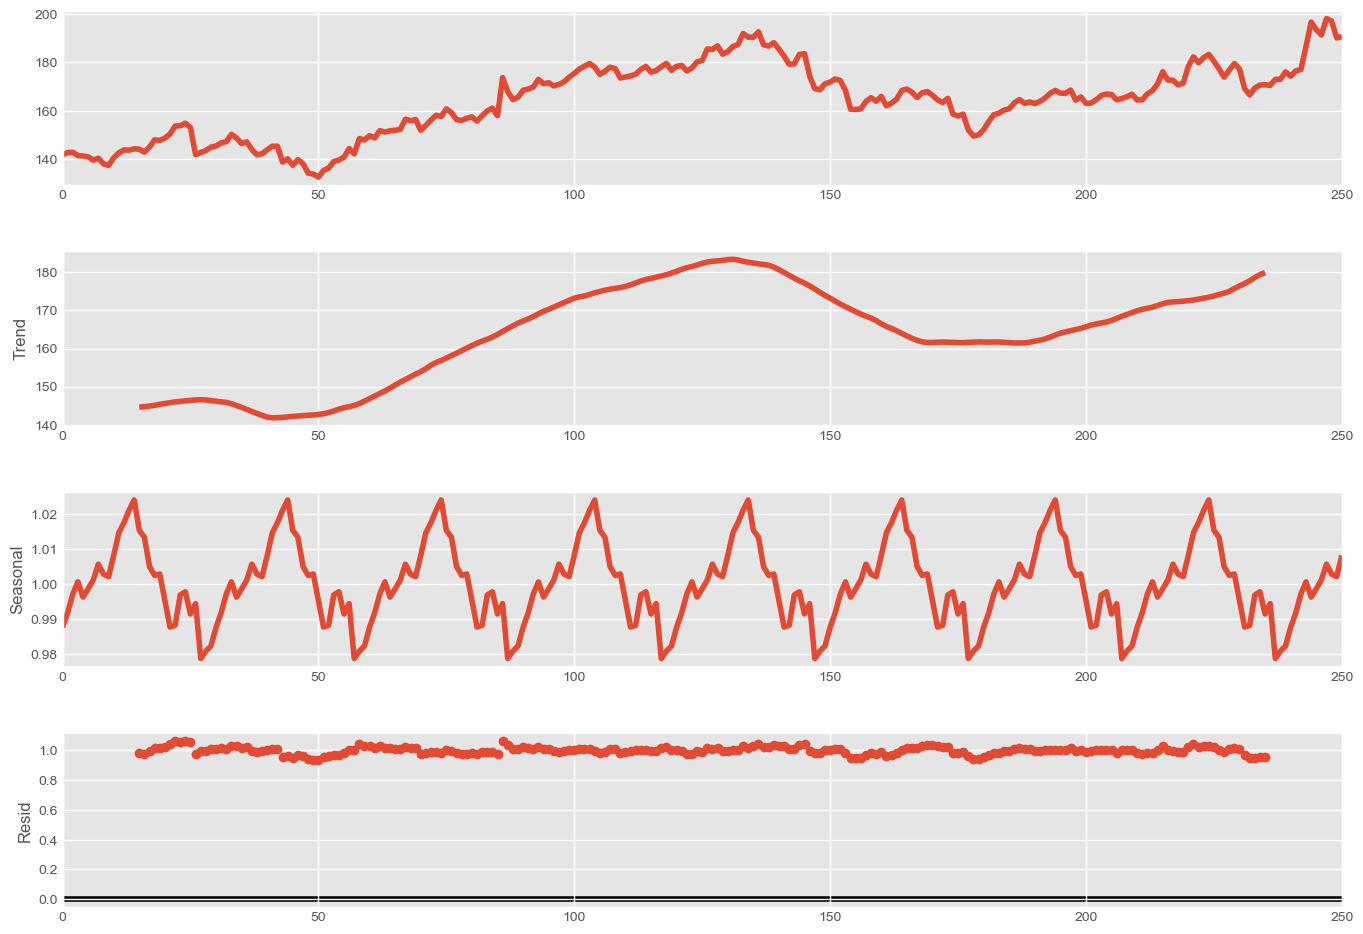

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

1. The overall price has been increasing over time.
2. There are recurring cyclical patterns in the price, likely due to daily, weekly, or monthly factors.
3. There might be additional factors influencing the price that are not captured by the trend or seasonality components.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

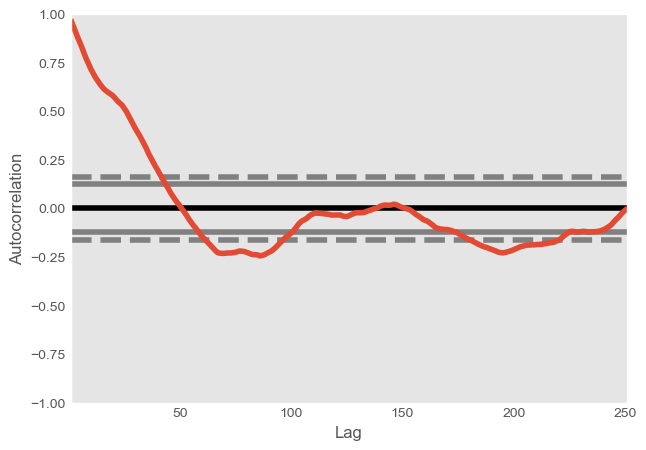

In [20]:
pd.plotting.autocorrelation_plot(data["Close"])


In [21]:
#Since the curve is moving down after the 10th line of the first boundary, therefore p = 10

C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


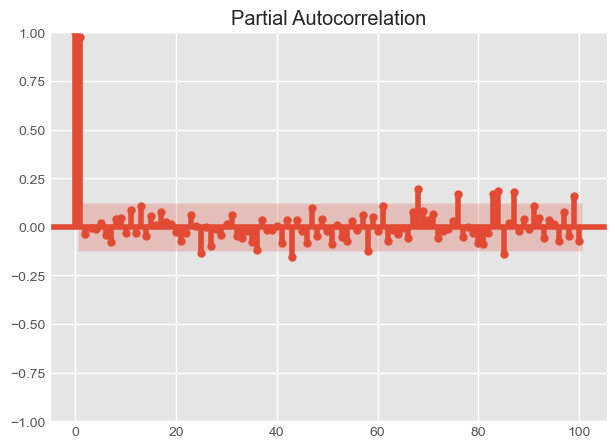

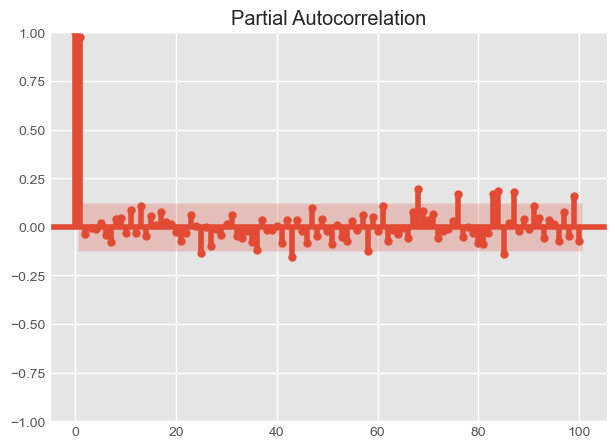

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [23]:
# 2 points are far away from others, therefore q=2 and since data is seasonal , d = 1

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
p, d, q = 10, 1, 2

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()

print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  251
Model:                ARIMA(10, 1, 2)   Log Likelihood                -614.471
Date:                Fri, 20 Dec 2024   AIC                           1254.941
Time:                        01:46:49   BIC                           1300.720
Sample:                             0   HQIC                          1273.366
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0694      0.292      0.238      0.812      -0.502       0.641
ar.L2          0.5220      0.351      1.487      0.137      -0.166       1.210
ar.L3         -0.0500      0.088     -0.570      0.5

In [25]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      141.800054
2      142.759665
3      142.722714
4      141.340455
          ...    
246    192.430225
247    191.478687
248    199.569057
249    196.000625
250    191.174279
Name: predicted_mean, Length: 251, dtype: float64


In [26]:
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                 GOOG   No. Observations:                  251
Model:             SARIMAX(10, 1, 2)x(10, 1, 2, 12)   Log Likelihood                -594.996
Date:                              Fri, 20 Dec 2024   AIC                           1239.992
Time:                                      01:51:09   BIC                           1326.799
Sample:                                           0   HQIC                          1274.976
                                              - 251                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1380      0.413      0.334      0.738      -0.671       0.947
ar.L2          0.56

1. Residuals show no significant autocorrelation or heteroskedasticity however they deviate significantly from normality. 
2. Despite similar fit metrics, neither model clearly outperforms the other based on information criteria alone, as both are complex and might overfit.
3. Both models include terms with high p-values (insignificant terms) that suggest potential model simplification.

In [27]:
predictions = model.predict(len(data), len(data)+20)
print(predictions)

251    190.726996
252    193.195382
253    193.090292
254    191.691908
255    188.290449
256    187.715807
257    188.102237
258    187.984661
259    188.330401
260    187.480238
261    186.258858
262    183.829684
263    184.247594
264    184.845467
265    186.886459
266    186.051408
267    188.393277
268    191.397112
269    190.606637
270    190.780774
271    193.653137
Name: predicted_mean, dtype: float64


<Axes: >

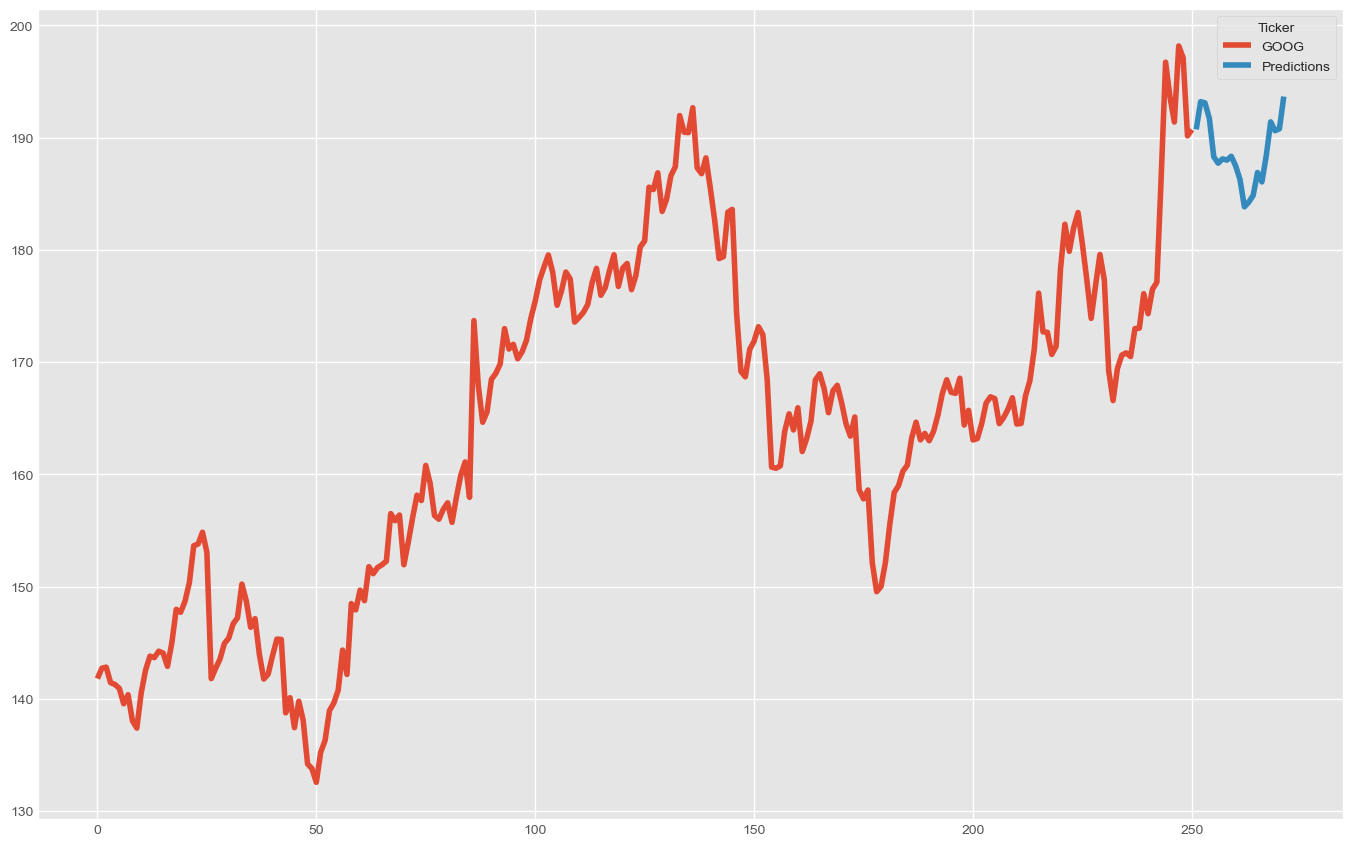

In [28]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

**PREDICTING CLOSING STOCK PRICE FOR AMZN USING LSTM**

In [29]:
df = yf.download('AMZN', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

Price        Date        Open        High         Low       Close   Adj Close  \
Ticker                   AMZN        AMZN        AMZN        AMZN        AMZN   
246    2024-12-13  228.399994  230.199997  225.860001  227.460007  227.460007   
247    2024-12-16  230.229996  233.000000  228.009995  232.929993  232.929993   
248    2024-12-17  232.389999  232.729996  227.850006  231.149994  231.149994   
249    2024-12-18  230.770004  231.399994  220.110001  220.520004  220.520004   
250    2024-12-19  225.089996  226.089996  222.919998  224.509995  224.509995   

Price     Volume  
Ticker      AMZN  
246     28768100  
247     37552100  
248     35948100  
249     43281400  
250     21696483  


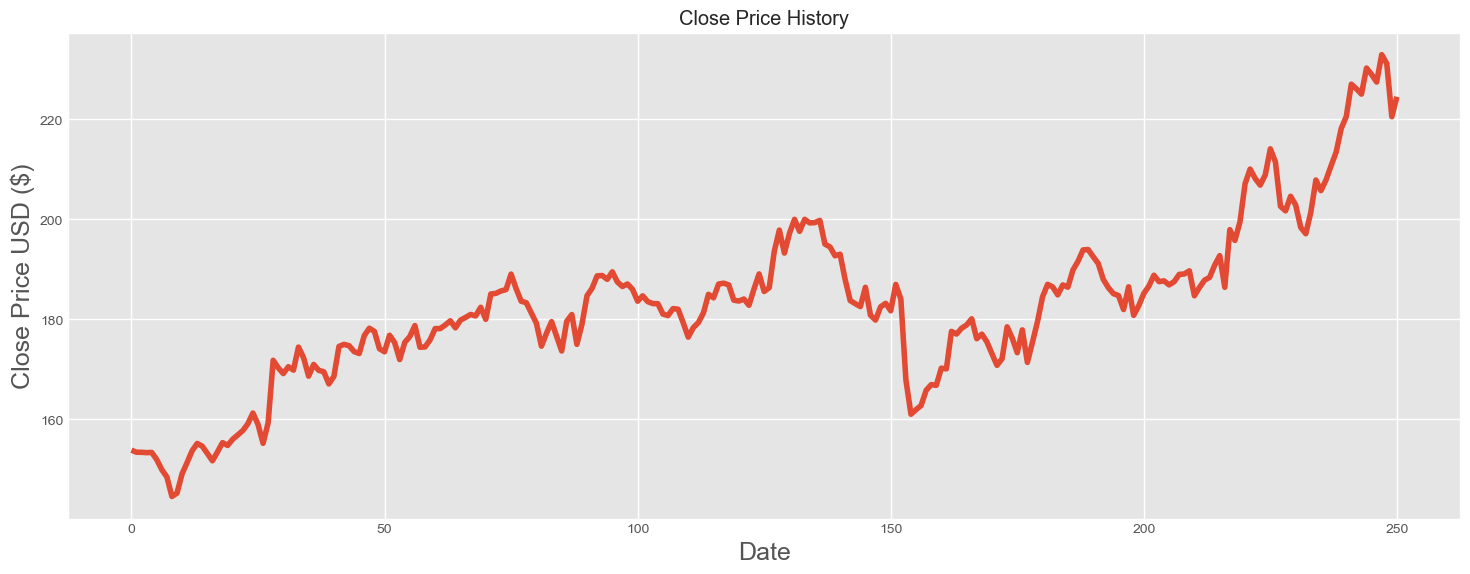

In [30]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [31]:
df = df["Close"]
print(df.head())

Ticker        AMZN
0       153.839996
1       153.419998
2       153.410004
3       153.339996
4       153.380005


In [32]:
dataset = df.values
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.10491162],
       [0.10015836],
       [0.10004524],
       [0.09925295],
       [0.09970574],
       [0.08340874],
       [0.06066078],
       [0.04413756],
       [0.        ],
       [0.0075826 ],
       [0.05126754],
       [0.07695777],
       [0.1036667 ],
       [0.12007681],
       [0.11373913],
       [0.09721591],
       [0.0808058 ],
       [0.10106376],
       [0.12188763],
       [0.11554995],
       [0.12958351],
       [0.13920314],
       [0.14916246],
       [0.16466716],
       [0.18888626],
       [0.16330913],
       [0.12030321],
       [0.16647798],
       [0.30828423],
       [0.29130822],
       [0.27818007],
       [0.29379805],
       [0.28598906],
       [0.338162  ],
       [0.31428241],
       [0.27240828],
       [0.29889082],
       [0.28553644],
       [0.28225432],
       [0.25475326],
       [0.27184238],
       [0.33963331],
       [0.34427346],
       [0.34133084],
       [0.32786318],
       [0.32356271],
       [0.36430503],
       [0.380

In [34]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.10491162, 0.10015836, 0.10004524, 0.09925295, 0.09970574,
       0.08340874, 0.06066078, 0.04413756, 0.        , 0.0075826 ,
       0.05126754, 0.07695777, 0.1036667 , 0.12007681, 0.11373913,
       0.09721591, 0.0808058 , 0.10106376, 0.12188763, 0.11554995,
       0.12958351, 0.13920314, 0.14916246, 0.16466716, 0.18888626,
       0.16330913, 0.12030321, 0.16647798, 0.30828423, 0.29130822,
       0.27818007, 0.29379805, 0.28598906, 0.338162  , 0.31428241,
       0.27240828, 0.29889082, 0.28553644, 0.28225432, 0.25475326,
       0.27184238, 0.33963331, 0.34427346, 0.34133084, 0.32786318,
       0.32356271, 0.36430503, 0.38082842, 0.37358533, 0.33442726,
       0.32752368, 0.36498422, 0.34834771, 0.30998194, 0.34880033,
       0.3620416 , 0.3868266 , 0.3378225 , 0.33850151, 0.35457211])]
[0.3800361265187988]

[array([0.10491162, 0.10015836, 0.10004524, 0.09925295, 0.09970574,
       0.08340874, 0.06066078, 0.04413756, 0.        , 0.0075826 ,
       0.05126754, 0.07695777, 0.103

In [35]:
!pip install tensorflow

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0203


In [37]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


21.18267492004352

In [38]:
train = df.iloc[:training_data_len]
valid = df.iloc[training_data_len:]
valid['Predictions'] = predictions
valid


C:\Users\shubh\AppData\Local\Temp\ipykernel_7932\84718757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Ticker,AMZN,Predictions
239,218.160004,195.907486
240,220.550003,197.391037
241,227.029999,199.147766
242,226.089996,201.360229
243,225.039993,203.562424
244,230.259995,205.482132
245,228.970001,207.429565
246,227.460007,209.108109
247,232.929993,210.367859
248,231.149994,211.660126


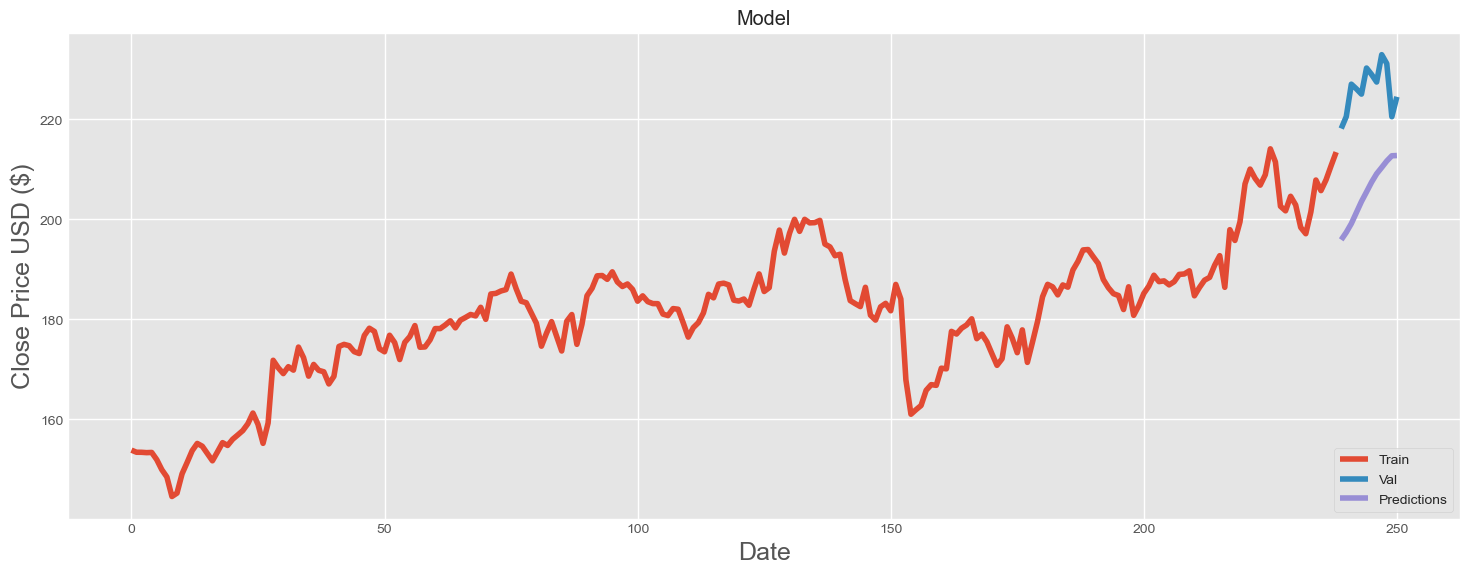

In [39]:
# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['AMZN'])
plt.plot(valid[['AMZN', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**Results** : 
The model has learned the underlying patterns in the historical data and is able to capture the general direction of the time series. However, towards the end of the prediction period, the predictions deviate from the actual data. This suggests that the model's accuracy might decrease as the prediction horizon increases.

Possible Reasons for Prediction Deviation can be model complexity, data variability or bias. 
